# Проект "Карьера блоггера с опорой на данные"



Цель проекта - изучить 1000 самых популярных блогеров инстаграма, их категории, вовлечённость подписчиков по категориям/людям/регионам, чтобы узнать, что необходимо начинающему блогеру для успешного старта карьеры в инстаграме, какой категории должен быть его контент, как, предположительно, аудитория будет на него реагировать и как его контент может быть замечен. Предполагаем, что анализ ведётся для блогера из России/Европы, желающего набрать подписчиков из этого региона.

С просторов kaggle взят датасет с 1000 топ-аккаунтами инстаграма (на декабрь 2022) и из другого источника датасет с миллионами хештегов и их количеством их использований, что поможет определить, какие хештеги, слова могут продвинуть блогера.

## Анализ топ 1000 инфлюенсеров:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

Датафрейм содержит:

- Influencer insta name - @ аккаунта
- instagram name - имя в описании
- category_1 - категория контента
- category_2 - дополнительная категория
- Followers - количество полписчиков
- Audience country(mostly) - основная страна подписчиков, часто совпадает со страной происхождения блогера, но не всегда, что надо помнить
- Authentic engagement - вовлечённость "реальных" людей
- Engagement avg - средняя вовлечённость среди всех, включая "подозрительные аккаунты"

In [ ]:
df=pd.read_csv('/content/social media influencers - instagram.csv')
display(df.head(5))
print(df.info())
print(df.describe())

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB
None
       Influencer insta name instagram name category_1  \
count                   1000            979        892   
unique                   997            975         31   
top            angelinajolie   Bruno Goes 🎭      Music   
freq                       2              2        235   

                    

### Предобработка:

In [ ]:
print(df.columns)
#Приводим в порядок названия столбцов
df = df.rename(columns={'Influencer insta name':'id', 'instagram name':'name', 'category_1':'category', 'Followers':'followers',
'Audience country(mostly)':'main_country', 'Authentic engagement\r\n':'engagement','Engagement avg\r\n':'avg_engagement'})
print('Дубликаты:',df.duplicated().sum())
print('Дубликаты по id:',df.duplicated(subset='id').sum())
print('Дубликаты: по name',df.duplicated(subset='name').sum())

Index(['id', 'name', 'category', 'category_2', 'followers', 'main_country',
       'engagement', 'avg_engagement', 'region', 'eng_rate'],
      dtype='object')
Дубликаты: 0
Дубликаты по id: 0
Дубликаты: по name 21


In [ ]:
#Рассмотрим дубликаты среди айди и имён
display(df[df.duplicated(['id'], keep=False)])
df=df.drop_duplicates(subset='id',keep='last')

,id,name,category,category_2,followers,main_country,engagement,avg_engagement
63,angelinajolie,Angelina Jolie,NaN,NaN,12.6M,Brazil,274.6K,456.2K
64,angelinajolie,Angelina Jolie,Lifestyle,NaN,12.6M,Brazil,274.6K,456.1K
458,justinbieber,Justin Bieber,Music,NaN,227M,India,439.1K,638.2K
459,justinbieber,Justin Bieber,Music,NaN,227.4M,India,314.2K,445.3K
692,nobru,Bruno Goes 🎭,NaN,NaN,13.2M,NaN,0,350.2K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,Computers & Gadgets,13.2M,NaN,0,350.1K


In [ ]:
display(df[df.duplicated(['name'], keep=False)])

,id,name,category,category_2,followers,main_country,engagement,avg_engagement
10,21savage,NaN,Music,NaN,13.2M,United States,263.5K,462K
23,addisonraee,NaN,Beauty,NaN,40.5M,United States,1.1M,1.6M
26,adinross,NaN,NaN,NaN,2.6M,United States,551.1K,1.1M
34,alexademie,NaN,NaN,NaN,10.8M,United States,1.2M,2.1M
51,amandamanopo,NaN,Modeling,Beauty,15.2M,Indonesia,189.6K,250.5K
110,badbunnypr,NaN,Music,NaN,38.5M,United States,2.5M,3.9M
250,dominicfike,NaN,NaN,NaN,3.7M,United States,419.9K,799K
275,emilia_clarke,NaN,Cinema & Actors/actresses,NaN,27M,India,490.5K,617.2K
319,ggonekim,NaN,NaN,NaN,5.1M,Indonesia,441.6K,542.6K
345,harrystyles,NaN,Music,Fashion,43.3M,Brazil,2.9M,3.9M


Удалены три дубликата по айди, дубликаты в name - отсутствие имени в профиле.

In [ ]:
print(f'Всего подписчиков из {len(df.main_country.unique())} стран.')
print('')
print(df.main_country.unique())

Всего подписчиков из 33 стран.

['Spain' 'Indonesia' 'Russia' 'Brazil' 'Poland' 'South Korea'
 'United States' 'Thailand' 'India' 'Iraq' 'Morocco' 'Turkey' nan 'Mexico'
 'Chile' 'Iran' 'Italy' 'Colombia' 'Argentina' 'Philippines'
 'United Kingdom' 'Germany' 'Nigeria' 'Serbia' 'Albania'
 'United Arab Emirates' 'China' 'France' 'Japan' 'Egypt' 'Syria' 'Algeria'
 'Ukraine']


Кластеризуем страны:

In [ ]:
 def region(x):
  if x in ['Spain','Russia','Poland','Turkey','Italy','United Kingdom','Germany','Serbia','Albania',
           'France','Egypt','Ukraine','Morocco','Algeria']:
    return 'Europe'
  elif x in ['Indonesia','South Korea','Thailand','India','Philippines','China','Japan']:
    return 'Asia'
  elif x in ['Brazil','United States','Mexico','Chile','Colombia','Argentina']:
    return 'America'
  elif x in ['Iraq','Iran','Nigeria','United Arab Emirates','Syria']:
    return 'America'
  else: return 'No info'

df['region']=df['main_country'].apply(region)

In [ ]:
print(f'Всего категорий: {len(df.category.unique())}.')
print('')
print(df.category.unique())

Всего категорий: 32.

['Sports with a ball' 'Music' 'Shows' 'Lifestyle' nan
 'Humor & Fun & Happiness' 'Cinema & Actors/actresses' 'Beauty'
 'Clothing & Outfits' 'Fashion' 'Modeling' 'Food & Cooking' 'Family'
 'Fitness & Gym' 'Computers & Gadgets' 'Art/Artists' 'Finance & Economics'
 'Cars & Motorbikes' 'Photography' 'Racing Sports'
 'Literature & Journalism' 'Business & Careers' 'Animals'
 'Nature & landscapes' 'Adult content' 'Accessories & Jewellery'
 'Education' 'Management & Marketing' 'Luxury' 'Science'
 'Machinery & Technologies' 'Kids & Toys']


In [ ]:
print(f'Всего второстепенных категорий: {len(df.category_2.unique())}.')
print('')
print(df.category_2.unique())

Всего второстепенных категорий: 28.

[nan 'Cinema & Actors/actresses' 'Lifestyle' 'Shopping & Retail'
 'Art/Artists' 'Literature & Journalism' 'Beauty' 'Shows' 'Music' 'Family'
 'Photography' 'Humor & Fun & Happiness' 'Business & Careers' 'Fashion'
 'Modeling' 'Luxury' 'Machinery & Technologies' 'Sports with a ball'
 'Trainers & Coaches' 'Clothing & Outfits' 'Finance & Economics'
 'Cars & Motorbikes' 'Adult content' 'Comics & sketches' 'Science'
 'Kids & Toys' 'Computers & Gadgets' 'Fitness & Gym']


Переведём показатели в числа для дальнейшей работы:

In [ ]:
def str_to_float(value):
  if 'K' in value:
    value=float(value[:-1])
    return value*1000
  if 'M' in value:
    value=float(value[:-1])
    return value*1000000

df['engagement']=df['engagement'].apply(str_to_float)
df['followers']=df['followers'].apply(str_to_float)


Перевели в числа только показатель engagement, так как по сравнению с avg_engagement он включает в себя только активность "настоящих" пользователей, то есть аккаунты с небольшим числом подписок (до 1000) и не имеющие подозрительной активности. Такая метрика будет более репрезентативна.

Добавим engagement rate, разделив engagement на followers:

In [ ]:
df['eng_rate'] = round(df['engagement']/df['followers']*100,2)

Проверим записи с пустыми значениями в столбцах category и main_country:

In [ ]:
df[df['category'].isna()].head(60)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
4,_jeongjaehyun,Jaehyun,NaN,NaN,11100000.00,Indonesia,2500000.00,3.1M,Asia,22.52
5,_mariahwasa,HWASA,NaN,NaN,7900000.00,Brazil,915100.00,1.2M,America,11.58
8,_shotaroo_,SHOTARO ショウタロウ,NaN,NaN,4900000.00,Indonesia,860100.00,1.1M,Asia,17.55
9,03_hu,박지후,NaN,NaN,4100000.00,South Korea,711000.00,872.6K,Asia,17.34
19,actorprabhas,Prabhas,NaN,NaN,8200000.00,India,482200.00,540.2K,Asia,5.88
20,actorsuriya,Suriya Sivakumar,NaN,NaN,4100000.00,India,491300.00,637.7K,Asia,11.98
26,adinross,NaN,NaN,NaN,2600000.00,United States,551100.00,1.1M,America,21.20
27,aespa_official,aespa 에스파,NaN,NaN,8300000.00,Indonesia,1100000.00,1.6M,Asia,13.25
28,agustd,SUGA of BTS 민윤기,NaN,NaN,31500000.00,NaN,10900000.00,10.9M,No info,34.60
34,alexademie,NaN,NaN,NaN,10800000.00,United States,1200000.00,2.1M,America,11.11


In [ ]:
df[df['main_country'].isna()].head(60)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
28,agustd,SUGA of BTS 민윤기,NaN,NaN,31500000.00,NaN,10900000.00,10.9M,No info,34.60
258,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,Finance & Economics,13500000.00,NaN,NaN,214.2K,No info,NaN
337,haechanahceah,HAECHAN,NaN,NaN,2700000.00,NaN,NaN,2.1M,No info,NaN
396,j.m,JIMIN of BTS,NaN,NaN,32700000.00,NaN,12700000.00,12.7M,No info,38.84
445,joshu_acoustic,Joshua Hong,Music,NaN,4000000.00,NaN,NaN,1M,No info,NaN
457,jungkook.97,Jungkook,NaN,NaN,35800000.00,NaN,11400000.00,11.4M,No info,31.84
557,lomon991111,Lomon 991111,NaN,NaN,5700000.00,NaN,NaN,1.7M,No info,NaN
693,nobru,Bruno Goes 🎭,Machinery & Technologies,Computers & Gadgets,13200000.00,NaN,NaN,350.1K,No info,NaN
710,pablogavi,GAVI,NaN,NaN,3300000.00,NaN,NaN,841.6K,No info,NaN
780,rkive,RM,NaN,NaN,31300000.00,NaN,8600000.00,8.6M,No info,27.48


Большинство аккаунтов с пропущенными значениями категорий или основной страны принадлежат азиатским знаменитостям, поэтому ценность их влияния для исследования меньше, чем ценность западных и русских знаменитостей, так как наша цель - привлечение русской/западной аудитории.

### Анализ аккаунтов всех регионов:

#### Общая информация:

In [ ]:
display(df.describe())
print('Медианное количество фолловеров:', df['followers'].median())
print('Медианное количество вовлечённых фолловеров:', df['engagement'].median())
print('Медианный уровень вовлечённости:', df['eng_rate'].median())

,followers,engagement,eng_rate
count,997.00,989.00,989.00
mean,25540020.06,687620.12,4.74
std,40588333.85,1195098.42,5.84
min,2600000.00,29200.00,0.02
25%,9000000.00,214700.00,1.10
50%,14600000.00,375200.00,2.56
75%,26500000.00,687500.00,5.91
max,487200000.00,12700000.00,58.42


Медианное количество фолловеров: 14600000.0
Медианное количество вовлечённых фолловеров: 375200.0
Медианный уровень вовлечённости: 2.56


Среднее количество подписчиков: 25,5 млн, медианное: 14,6 млн, максимальное: 487,2 млн.

Среднее количество вовлечённых подписчиков: 687,6К, медианное: 375,2К, максимальное: 12,7 млн.

Уровень вовлечённости: средний: 4.74%, медианный: 2.56%, минимальный: 0.02%, максимальный: 58.42%.

#### Топ-15 аккаунтов по подписчикам:

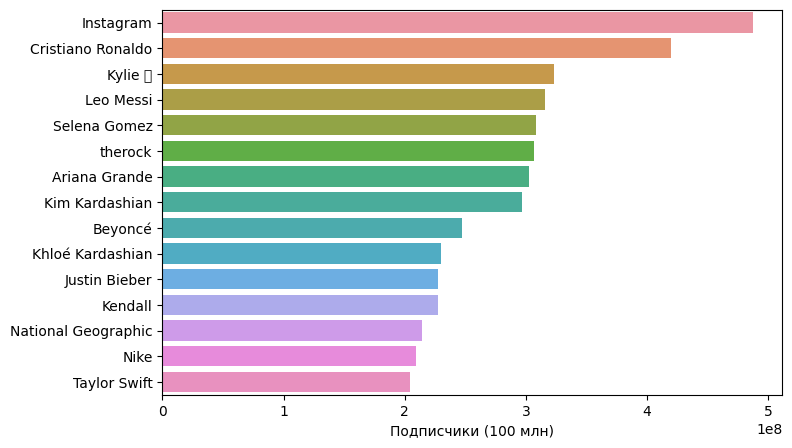

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y='name',x='followers',data=df.sort_values(by='followers', ascending=False).head(15))\
.set(xlabel='Подписчики (100 млн)', ylabel='');

In [ ]:
df.sort_values(by='followers', ascending=False).head(15)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
388,instagram,Instagram,Photography,NaN,487200000.00,India,352300.00,467.4K,Asia,0.07
203,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,419600000.00,India,5700000.00,7M,Asia,1.36
510,kyliejenner,Kylie 🤍,Fashion,Modeling,323300000.00,United States,7600000.00,12.3M,America,2.35
532,leomessi,Leo Messi,Sports with a ball,Family,315400000.00,Argentina,4000000.00,5.3M,America,1.27
814,selenagomez,Selena Gomez,Music,Lifestyle,308200000.00,United States,3300000.00,4.4M,America,1.07
899,therock,therock,Cinema & Actors/actresses,Fitness & Gym,307000000.00,India,303400.00,396K,Asia,0.10
87,arianagrande,Ariana Grande,Music,NaN,302300000.00,United States,2900000.00,4.1M,America,0.96
494,kimkardashian,Kim Kardashian,Fashion,Beauty,296400000.00,United States,2000000.00,2.9M,America,0.67
126,beyonce,Beyoncé,Music,Fashion,246900000.00,United States,2600000.00,3.7M,America,1.05
489,khloekardashian,Khloé Kardashian,Clothing & Outfits,Lifestyle,230200000.00,United States,991100.00,1.2M,America,0.43


Наибольшее количество подписчиков имеют такие аккаунты, как офф. аккаунт самого Инстаграма (487,2 млн), футболист Рональдо (419,6 млн) и модель Кайли Дженнер (323,3 млн). Эти и другие аккаунты на графике существуют много лет, поэтому имеют большое количество подписчиков и их вовлечённость ниже среднего уровня, так как с годами накопилось много подписчиков, ставшими мёртвым грузом, поэтому нам и важна метрика Engagement Rate больше, чем другие (она и вытекает из других).

#### Вовлечённость:

Самая важная метрика для инстаграма - Engagement Rate (ER), так как она определяется, насколько пользователи заинтересованы контентом блогера, хотят его видеть, реагировать. Эта метрика также влияет на вероятность показа контента другим пользователям, что пост "взлетит", что для начинающего блогера и является самым важным условием успеха.

##### Топ аккаунтов по вовлечённости:

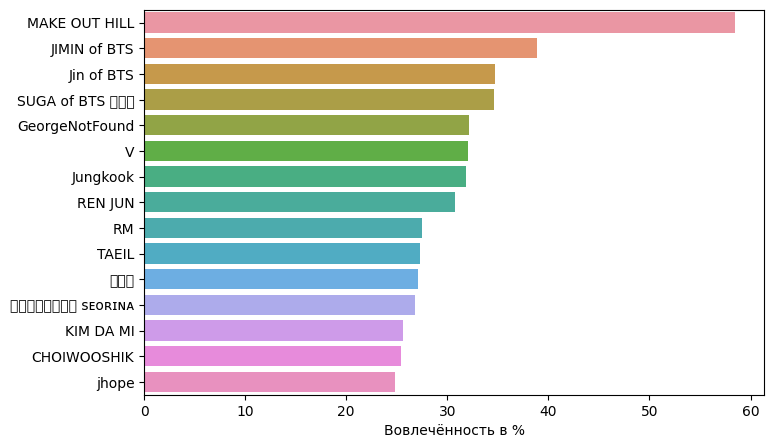

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y='name',x='eng_rate',data=df.sort_values(by='eng_rate', ascending=False).head(15))\
.set(ylabel='',xlabel='Вовлечённость в %');

In [ ]:
df.sort_values(by='eng_rate', ascending=False).head(15)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
968,xxxtentacion,MAKE OUT HILL,Music,NaN,20200000.00,United States,11800000.00,20.8M,America,58.42
396,j.m,JIMIN of BTS,NaN,NaN,32700000.00,NaN,12700000.00,12.7M,No info,38.84
432,jin,Jin of BTS,NaN,NaN,32000000.00,United States,11100000.00,11.1M,America,34.69
28,agustd,SUGA of BTS 민윤기,NaN,NaN,31500000.00,NaN,10900000.00,10.9M,No info,34.60
316,georgenotfound,GeorgeNotFound,NaN,NaN,3100000.00,United States,997800.00,1.1M,America,32.19
903,thv,V,NaN,NaN,38100000.00,NaN,12200000.00,12.2M,No info,32.02
457,jungkook.97,Jungkook,NaN,NaN,35800000.00,NaN,11400000.00,11.4M,No info,31.84
978,yellow_3to3,REN JUN,NaN,NaN,5200000.00,Indonesia,1600000.00,2M,Asia,30.77
780,rkive,RM,NaN,NaN,31300000.00,NaN,8600000.00,8.6M,No info,27.48
638,mo.on_air,TAEIL,NaN,NaN,4400000.00,Indonesia,1200000.00,1.4M,Asia,27.27


Аномально большой ER имеют Корейские музыканты (до 38%), блогер GeorgeNotFound в сфере видеоигр (32%) и известный на весь мир покойный репер XXXTentacion с ER в 58%. В рамках исследования информация имеет мало пользы, так как нам интересна западная аудитория и стабильно высокий ER, то есть не вызванный трагедией.

##### Вовлечённость по регионам:

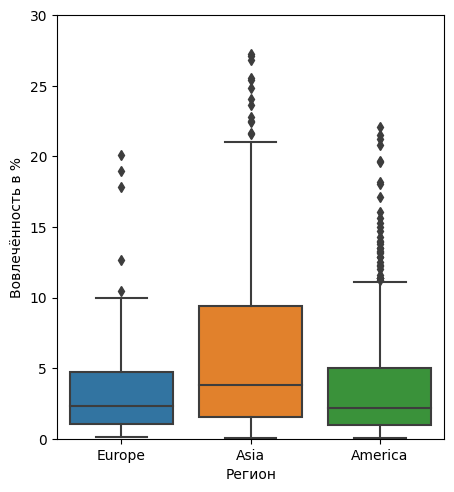

In [ ]:
plt.figure(figsize=(5,5.5))
sns.boxplot(data=df.query('region!="No info"'), x='region', y='eng_rate').set(ylabel='Вовлечённость в %',\
xlabel='Регион', ylim=[0,30]);

Европейский регион имеет наименьший ER - 3.38%, а Азиатский - наибольший - 6.39%.

#### Количество аккаунтов по категориям:

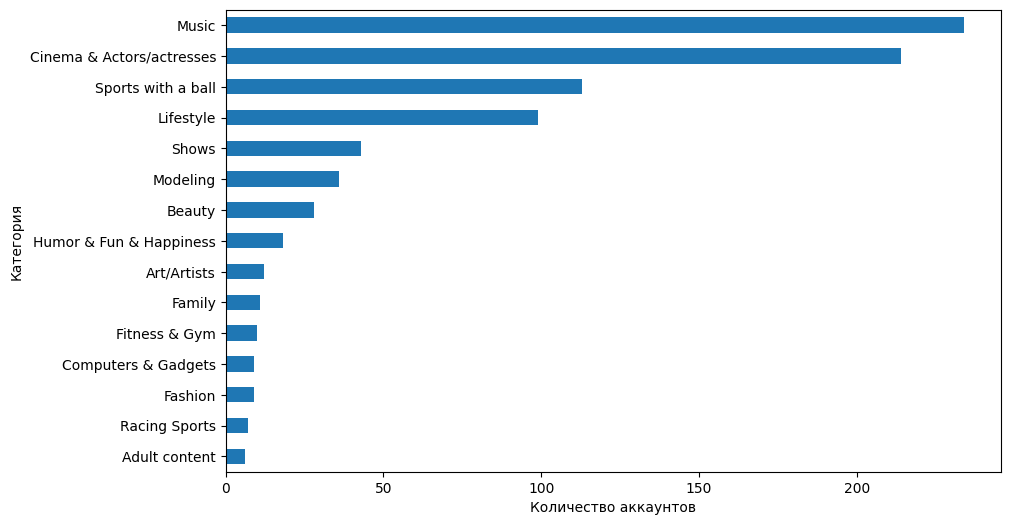

In [ ]:
df['category'].value_counts().head(15).sort_values(ascending=True)\
.plot(kind='barh', xlabel='Количество аккаунтов',ylabel='Категория',figsize=(10,6));

Большая часть инфлюенсеров относится к категориям Музыка или Кино (более 200 аккаунтов), далее - Футбол и Лайфстайл (более 100), остальные имеют до 50 аккаунтов в категории.

#### Разделение аудитории по регионам/странам:

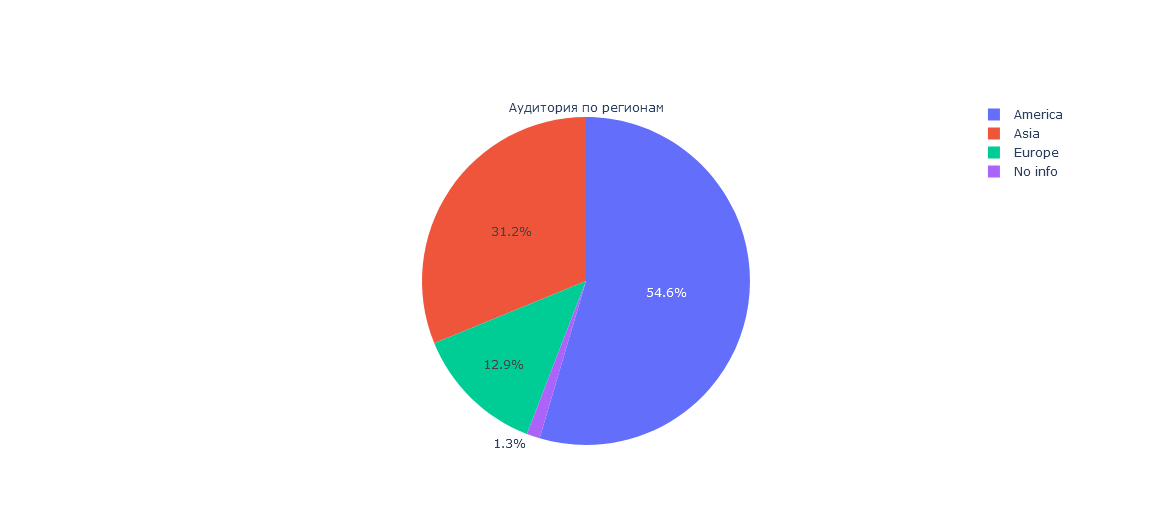

In [132]:
go.Figure(data=[go.Pie(title='Аудитория по регионам',labels=df['region'].value_counts().sort_values(ascending=True).index,\
                           values=df['region'].value_counts().sort_values(ascending=True))])
Image.open('/content/newplot(26).png').show()

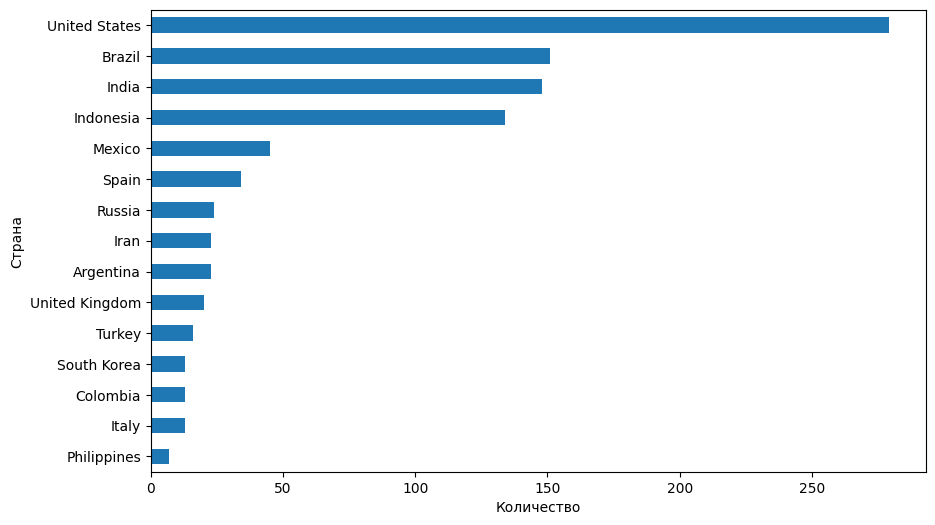

In [ ]:
df['main_country'].value_counts().head(15).sort_values(ascending=True).plot\
 (kind='barh',figsize=(10,6),xlabel='Количество',ylabel='Страна');

Основная аудитория (более 270 аккаунтов) из США, далее 140-150 - Бразилия, Индия, Индонезия, остальные - менее 50. Это говорит о том, что основная аудитория инфлюенсеров - Северная и Южная Америка (>50%), далее Азия (31%) и Европа (13%).

#### Популярность категорий по регионам:

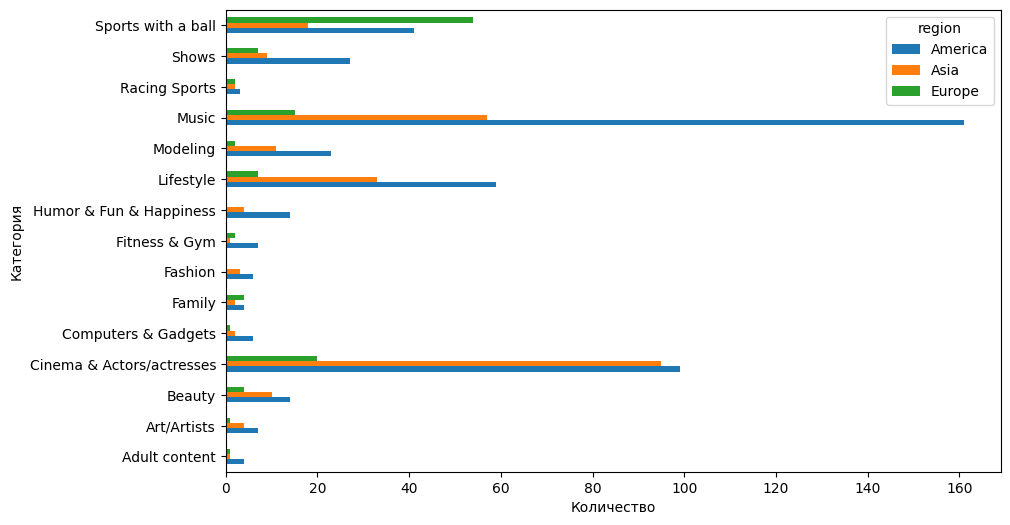

In [ ]:
#Сделаем срез, включающий аккаунты в 15 самых популярных категориях
cat=df['category'].value_counts().head(15).sort_values(ascending=True).index.values
df_cat = df.query('category in @cat')
pd.pivot_table(df_cat.query('region!="No info"'),values='main_country',index='category',columns='region',aggfunc='count')\
.plot(kind='barh',figsize=(10,6),xlabel='Количество',ylabel='Категория');

Во всех категориях порядок такой же: с большим отрывом лидирует Америка (1.5-2x), затем Азия и в конце Европа.

Из интересного:
- в Музыке Америка опережает другие регионы почти троекратно;
- В Европе Футбольный спорт популярнее, чем в других регионах, также в Европе популярнее, чем в Азии, категории Семья (Европа наравне с Америкой) и Фитнес;
- в категории Кино Америка и Азия почти наравне.

#### Engagement rate по категориям:

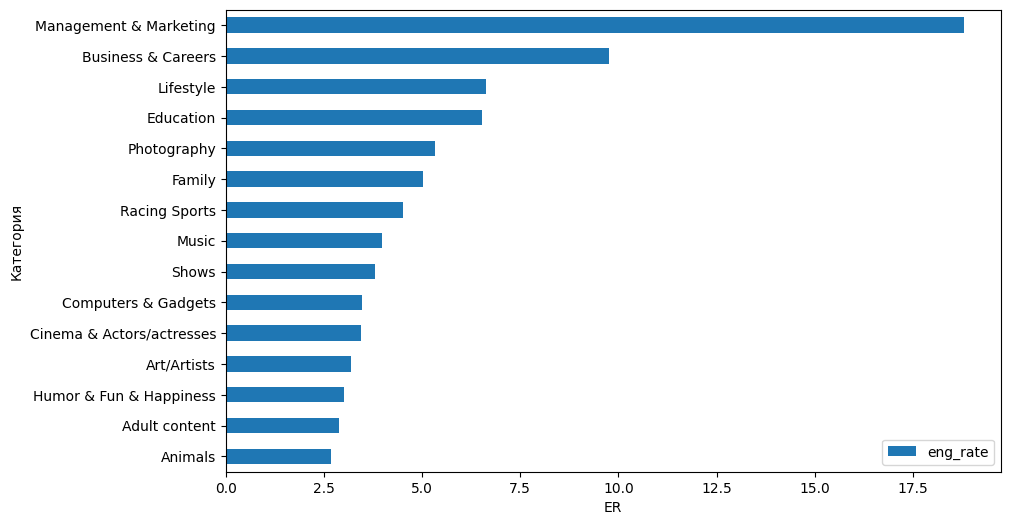

In [ ]:
pd.pivot_table(df,values='eng_rate',index='category',aggfunc='mean').sort_values(by='eng_rate', ascending=True).tail(15)\
.plot(kind='barh',figsize=(10,6),xlabel='ER',ylabel='Категория');

Наибольший ER имеют Маркетинг (>18%), Бизнес/карьера (10%) и Лайфстайл наравне с Образованием (<7.5%). Наименьший - Животные (2.5%), Взрослый контент (3%) и Юмор (3.5%).

### Анализ  Европейского региона и России:

Так как мы ориентируемся на Россию/Европу, рассмотрим аккаунты, принадлежащие к ним.

#### Топ-15 аккаунтов по подписчикам:

In [ ]:
#Срез по региону Европы
df_eu=df.query('region=="Europe"')
print('Всего записей:',len(df_eu))

Всего записей: 129


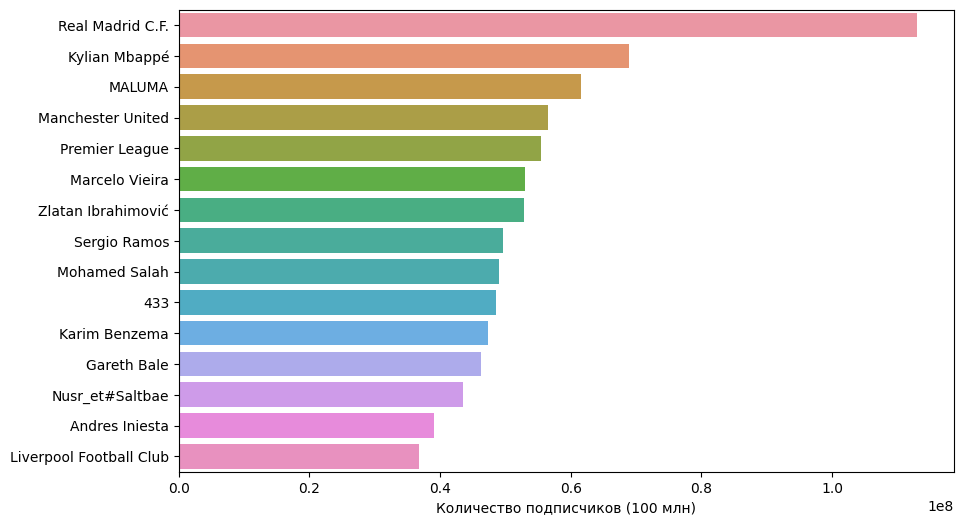

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y='name',x='followers',data=df_eu.sort_values(by='followers', ascending=False).head(15))\
.set(ylabel='',xlabel='Количество подписчиков (100 млн)');

Почти все топ-аккаунты принадлежат европейским футбольным клубам или футболистам.

#### Количество аккаунтов по категориям:

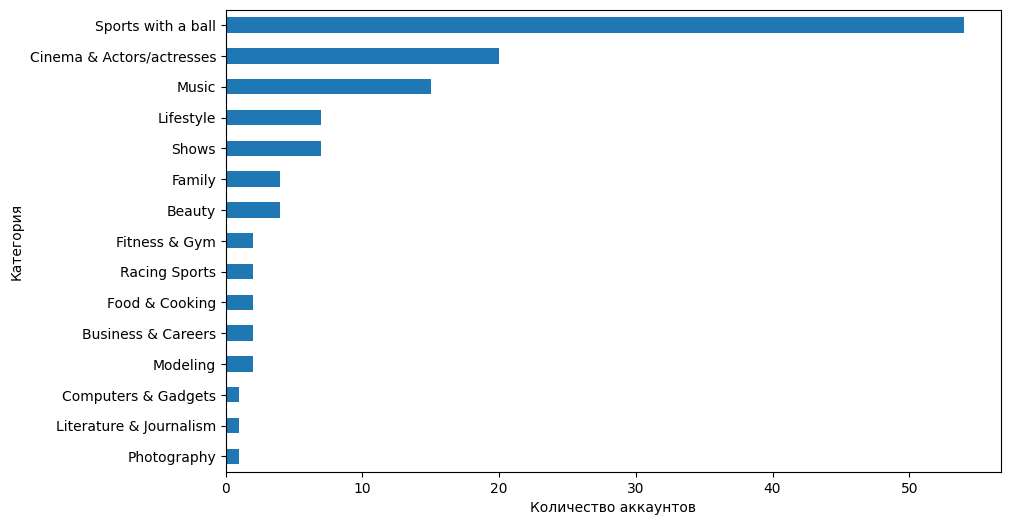

In [ ]:
df_eu['category'].value_counts().head(15).sort_values(ascending=True)\
.plot(kind='barh',figsize=(10,6),xlabel='Количество аккаунтов',ylabel='Категория');

Более трети аккаунтов имеют категорию Спорта (55 из 129), для дальнейшего анализа рассмотрим аккаунты, не имеющие этой категории.

In [ ]:
#Уберём категорию спорта:
df_eu1=df_eu.query('category!="Sports with a ball"')
print('Осталось аккаунтов:',len(df_eu1))
df_eu1.sample(3)
#Дальнейший анализ будет на основе оставшихся аккаунтов, то есть имеющих Европейский регион, но не относящихся к футболу

Осталось аккаунтов: 75


,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
172,caviarmagnat,by Tregubov,NaN,NaN,13300000.00,Russia,148600.00,214.4K,Europe,1.12
291,fabriziorom,Fabrizio Romano,Literature & Journalism,Shows,6400000.00,Italy,328900.00,570.6K,Europe,5.14
390,irinashayk,irinashayk,Modeling,NaN,17900000.00,Russia,121800.00,169K,Europe,0.68


#### Топ-15 по подписчикам, исключая спорт:

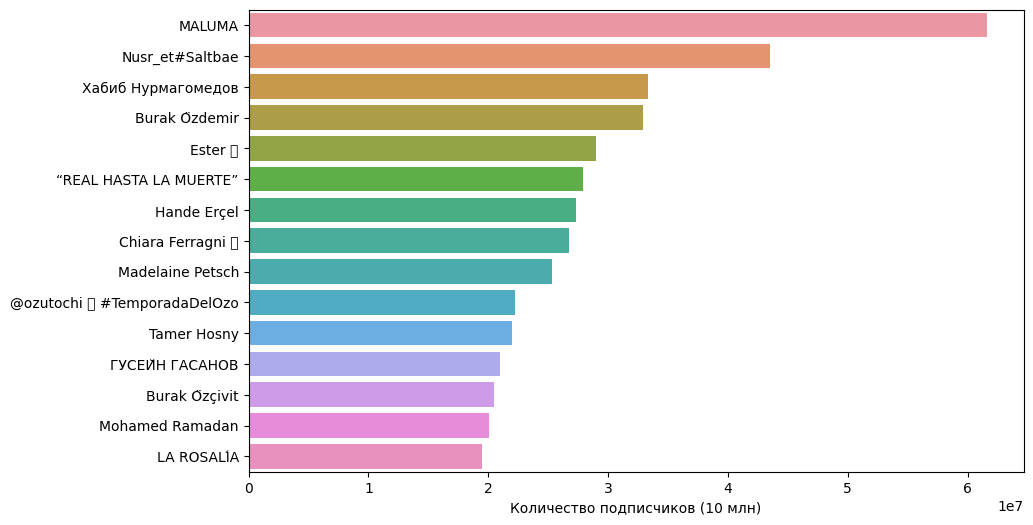

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y='name',x='followers',data=df_eu1.sort_values(by='followers', ascending=False).head(15))\
.set(ylabel='',xlabel='Количество подписчиков (10 млн)');

In [ ]:
df_eu1.sort_values(by='followers', ascending=False).head(15)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
586,maluma,MALUMA,Music,NaN,61600000.00,Italy,329200.00,507.6K,Europe,0.53
699,nusr_et,Nusr_et#Saltbae,Food & Cooking,NaN,43500000.00,Turkey,192900.00,285.4K,Europe,0.44
487,khabib_nurmagomedov,Хабиб Нурмагомедов,Fitness & Gym,NaN,33300000.00,Russia,252600.00,353.3K,Europe,0.76
205,cznburak,Burak Özdemir,Food & Cooking,NaN,32900000.00,Turkey,615200.00,836K,Europe,1.87
284,ester_exposito,Ester 🌙,Cinema & Actors/actresses,NaN,29000000.00,Russia,2900000.00,4.3M,Europe,10.00
78,anuel,“REAL HASTA LA MUERTE”,Music,NaN,27900000.00,Spain,586000.00,892.1K,Europe,2.10
341,handemiyy,Hande Erçel,Cinema & Actors/actresses,NaN,27300000.00,Turkey,2100000.00,2.8M,Europe,7.69
183,chiaraferragni,Chiara Ferragni ✨,Beauty,NaN,26700000.00,Italy,372000.00,616.6K,Europe,1.39
579,madelame,Madelaine Petsch,Cinema & Actors/actresses,NaN,25300000.00,Russia,1300000.00,1.8M,Europe,5.14
709,ozuna,@ozutochi 🔜 #TemporadaDelOzo,Music,NaN,22200000.00,Spain,167100.00,225.3K,Europe,0.75


Среди аккаунтов с наибольшим количеством подписчиков встречаются самые разнообразные категории: Музыка, Кино, Еда, Спорт. Самые популярные каналы: турецкий музыкант Малума (61,6 млн), шеф-повар Salt Bae (43,5 млн) и спортсмен Хабиб Нурмагомедов (33,3 млн).

#### Топ-15 ER, исключая спорт:

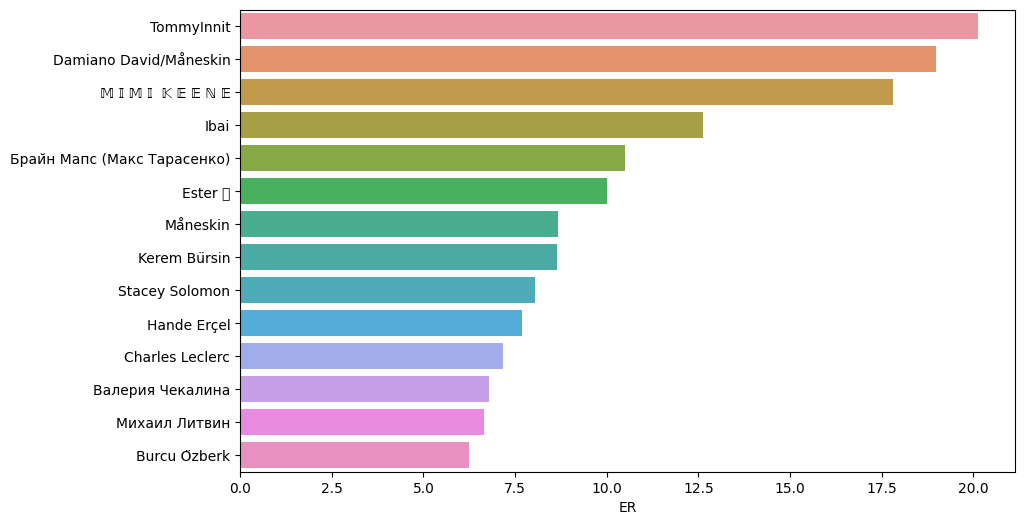

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y='name',x='eng_rate',data=df_eu1.sort_values(by='eng_rate', ascending=False).head(15))\
.set(ylabel='',xlabel='ER');

In [ ]:
df_eu1.sort_values(by='eng_rate', ascending=False).head(15)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
912,tommyinnit,TommyInnit,Lifestyle,NaN,3600000.00,France,724800.00,817.4K,Europe,20.13
981,ykaaar,Damiano David/Måneskin,NaN,NaN,5100000.00,Italy,968100.00,1.3M,Europe,18.98
632,mimikeene3,𝕄 𝕀 𝕄 𝕀 𝕂 𝔼 𝔼 ℕ 𝔼,Cinema & Actors/actresses,NaN,4300000.00,United Kingdom,765800.00,1.4M,Europe,17.81
380,ibaillanos,Ibai,Art/Artists,NaN,6800000.00,Spain,859100.00,1.2M,Europe,12.63
148,brianmaps,Брайн Мапс (Макс Тарасенко),Photography,NaN,5800000.00,Russia,608400.00,627.9K,Europe,10.49
284,ester_exposito,Ester 🌙,Cinema & Actors/actresses,NaN,29000000.00,Russia,2900000.00,4.3M,Europe,10.00
590,maneskinofficial,Måneskin,Lifestyle,NaN,6000000.00,Italy,519400.00,733.5K,Europe,8.66
887,thebursin,Kerem Bürsin,Cinema & Actors/actresses,NaN,10300000.00,Russia,891200.00,1.2M,Europe,8.65
857,staceysolomon,Stacey Solomon,Family,NaN,5100000.00,United Kingdom,409700.00,493.6K,Europe,8.03
341,handemiyy,Hande Erçel,Cinema & Actors/actresses,NaN,27300000.00,Turkey,2100000.00,2.8M,Europe,7.69


Среди топа по ER попадаются такие категории, как Лайфстайл, Музыка и Кино. Наибольший уровень вовлечённости имеют TommyInnit (20%), музыкант Damiano David (19%) и блогерша MIMIKEENE (18%).

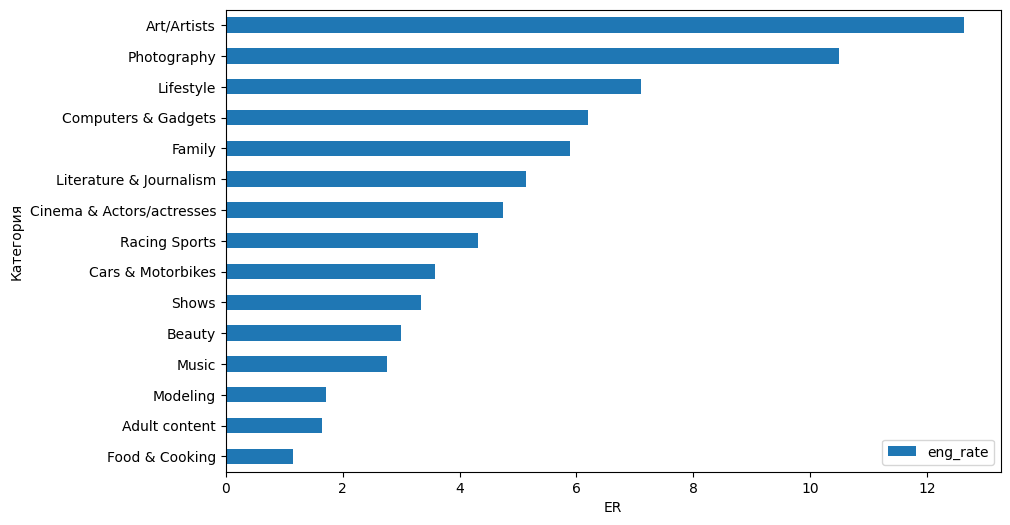

In [ ]:
pd.pivot_table(df_eu1,values='eng_rate',index='category',aggfunc='mean').sort_values(by='eng_rate', ascending=True).tail(15)\
.plot(kind='barh',figsize=(10,6),xlabel='ER',ylabel='Категория');

Больше всего "вовлечена" аудитория в категории Искусство, Фото и Лайфстайл (>12%, 10% и 7% соответственно). Меньше всего - Еда, Взрослый контент и Мода (от 1% до <2% соответственно). Что сильно отличается от мировых лидирующих категорий (Маркетинг, Бизнес, Лайфстайл).

#### Распределение аудитории по странам:

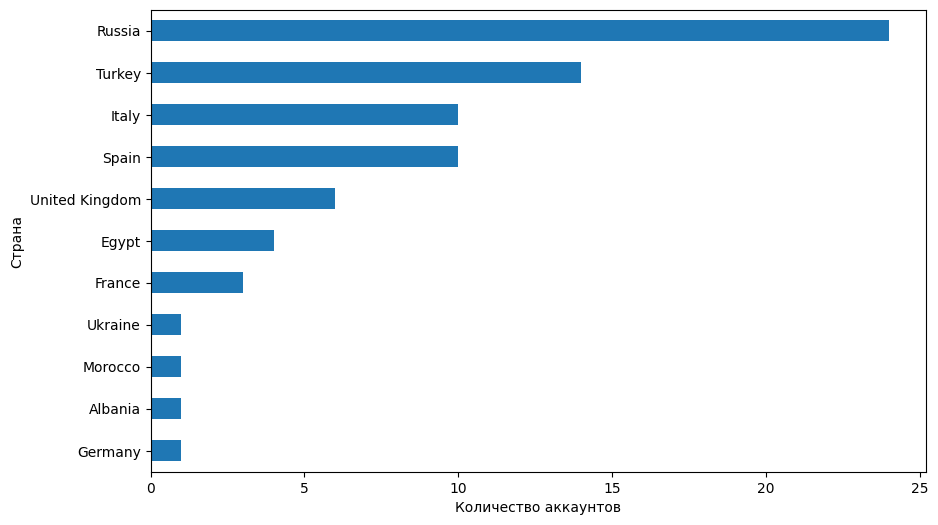

In [ ]:
df_eu1['main_country'].value_counts().head(15).sort_values(ascending=True)\
.plot(kind='barh',figsize=(10,6),xlabel='Количество аккаунтов',ylabel='Страна');

Самые упоминаемые страны - Россия - 24 аккаунта, Турция - 14, Италия/Испания - 10.

#### Русские аккаунты:

In [ ]:
#Оставляем только аккаунты с Россией как основной страной
rus=df.query('main_country=="Russia"')
print('Средний ER русских аккаунтов: {:.2f}'.format(rus['eng_rate'].mean()))
print('Средние количество подписчиков: {:.2f}'.format(rus['followers'].mean()))

Средний ER русских аккаунтов: 3.90
Средние количество подписчиков: 15516666.67


Средний ER русских аккаунтов ниже среднего мирового и ниже европейского без учёта футбола.

In [ ]:
display(rus)

,id,name,category,category_2,followers,main_country,engagement,avg_engagement,region,eng_rate
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000.00,Russia,310800.00,377.9K,Europe,1.65
142,borodylia,Ксения Бородина,Shows,Family,18200000.00,Russia,123000.00,153.2K,Europe,0.68
148,brianmaps,Брайн Мапс (Макс Тарасенко),Photography,NaN,5800000.00,Russia,608400.00,627.9K,Europe,10.49
172,caviarmagnat,by Tregubov,NaN,NaN,13300000.00,Russia,148600.00,214.4K,Europe,1.12
217,dava_m,Дава Ⓜ️ Всё будет хорошо🧸,Business & Careers,NaN,13700000.00,Russia,166000.00,215.9K,Europe,1.21
267,egorkreed,Егор Крид | #HeartBreakKid,Music,NaN,14700000.00,Russia,322600.00,396.9K,Europe,2.19
284,ester_exposito,Ester 🌙,Cinema & Actors/actresses,NaN,29000000.00,Russia,2900000.00,4.3M,Europe,10.00
327,goar_avetisyan,Goar Avetisyan,Beauty,NaN,11500000.00,Russia,510500.00,707.9K,Europe,4.44
334,gusein.gasanov,ГУСЕЙН ГАСАНОВ,Shows,NaN,21000000.00,Russia,524500.00,786.1K,Europe,2.50
340,hakkiakdenizz,hakki akdeniz,Business & Careers,NaN,17600000.00,Russia,120200.00,174.4K,Europe,0.68


In [ ]:
rus.category.value_counts()

Shows                        6
Cinema & Actors/actresses    4
Business & Careers           2
Music                        2
Modeling                     2
Family                       2
Photography                  1
Beauty                       1
Fitness & Gym                1
Lifestyle                    1
Cars & Motorbikes            1
Name: category, dtype: int64

Большая часть русских инфлюенсеров - это актёры, ведущие шоу и музыканты.

### Выводы и рекомендации:

#### По всему миру:

В ходе анализа было выявлено:

- Всего в датасете 33 страны и 32 основные категории.

- Среднее количество подписчиков: 25,5 млн, медианное: 14,6 млн, максимальное: 487,2 млн.
- Среднее количество вовлечённых подписчиков: 687,6К, медианное: 375,2К, максимальное: 12,7 млн.
- Уровень вовлечённости: средний: 4.74%, медианный: 2.56%, минимальный: 0.02%, максимальный: 58.42%.

- Аккаунты с наибольшим количеством подписчиков:
 - Инстаграм - 487.5 млн
 - Криштиану Роналду - 419,6 млн
 - Кайли Дженнер - 323,3 млн

 Также важно отметить, что эти аккаунты ведутся много лет, поэтому и имеют такое рекордное количество подписчиков, но их engagement rate меньше среднего (0.07%, 2.35% и 1.36% против 4.74% среднего).

- Аккаунты с наибольшей степенью вовлечённости (ER):
 - XXXTentacion - 58%
 - GeorgeNotFound - 32%
 - Корейские поп-музыканты - до 38%

 Такой ER крайне высок для обычного блогера и вызван разными причинами (трагичная смерть или крайне лояльная фанбаза).

- ER по регионам:
 - America - 3.86%
 - Asia - 6.39%
 - Europe - 3.38%

 Европа имеет наименьший ER, Азия - наибольший.

- Самые популярные категории: Музыка или Кино (более 200 аккаунтов), далее - Футбол и Лайфстайл (более 100), остальные имеют до 50 аккаунтов в категории.

- Основная аудитория: США (>270 аккаунтов с данной основной страной аудитории), далее Бразилия, Индия, Индонезия (140-150), остальные - менее 50.

 Это говорит о том, что основная аудитория инфлюенсеров - Северная и Южная Америка (>50%), далее Азия (31%) и Европа (13%).

- Наибольший ER имеют Маркетинг (>18%), Бизнес/карьера (10%) и Лайфстайл наравне с Образованием (<7.5%). Наименьший - Животные (2.5%), Взрослый контент (3%) и Юмор (3.5%).

#### По европейскому региону:

- Более трети аккаунтов имеют категорию Спорта - футбол (55 из 129).
- Наибольший ER: Искусство (>12%), Фото (10%) и Лайфстайл (7%).
- Наименьший: - Еда, Взрослый контент и Мода (от 1% до <2%).
- Самые упоминаемые страны - Россия - 24 аккаунта, Турция - 14, Италия/Испания - 10.
- Средний ER русских аккаунтов ниже среднего мирового и ниже европейского без учёта футбола.

#### Рекомендации начинающему блогеру:

Цель - внимание русской/европейской аудитории, получение наибольшего ER, что приведёт к "бусту" контента, его учащенному отображению любым пользователям, что является лучшим способов набрать аудиторию. Это можно достичь следующими способами:
- Связать контент с футбольной тематикой, так как в выбранном регионе эта категория наиболее популярна.
- Для наибольшего ER, то есть для повышения шанса получить "буст" контента от самого инстаграма создавать контент, связанный с искусством, фотографией, лайфстайлом, то есть эстетика, насыщенная визуальная составляющая и всё, что связано с реальной жизнью инфлюенсера.
- Европейская аудитория больше ценит красивый и расслабляющий контент, по сравнению с американским регионом, где ценится контент на тематику бизнеса, финансов и саморазвития.
- Европеская аудитория самая малочисленная, 13% от всего мира, но у начинающего блогера всё ещё большая потенциальная аудитория, особенно для русскоязычного контента.
- Но средний ER Европы и особенно России меньше общемирового, нужно готовиться к низким охватам.